In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv


Starting with one location

In [2]:
# read the data
file_names = ['Lucknow_1990_2022', 'Delhi_NCR_1990_2022_Safdarjung','Chennai_1990_2022_Madras','Rajasthan_1990_2022_Jodhpur','Bangalore_1990_2022_BangaloreCity','Mumbai_1990_2022_Santacruz']
df_s = []
cities = []
for file_name in file_names:
    city = file_name.split('_')[0]
    cities.append(city)
    df_city = pd.read_csv(f"/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/{file_name}.csv")
    df_city['city'] = city
    # fill in the missing values
    df_city['year']=df_city['time'].str.slice(6, 10).astype(int)
    df_city['month']=df_city['time'].str.slice(3, 5).astype(int)
    df_city['time2']=pd.to_datetime(df_city['time'])
    df_city2 = df_city.fillna(method="ffill").fillna(method="bfill")
    df_s.append(df_city2)
df_data = pd.concat(df_s)
# df_lko=pd.read_csv("/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv")
# df_del=pd.read_csv("/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv")
# df_data = pd.concat([df_lko, df_del])

In [3]:
# what does the data look like
df_data

,time,tavg,tmin,tmax,prcp,city,year,month,time2
0,01-01-1990,7.2,1.8,18.1,0.0,Lucknow,1990,1,1990-01-01
1,02-01-1990,10.5,1.8,17.2,0.0,Lucknow,1990,1,1990-02-01
2,03-01-1990,10.2,1.8,18.6,0.0,Lucknow,1990,1,1990-03-01
3,04-01-1990,9.1,1.8,19.3,0.0,Lucknow,1990,1,1990-04-01
4,05-01-1990,13.5,1.8,23.8,0.0,Lucknow,1990,1,1990-05-01
...,...,...,...,...,...,...,...,...,...
11889,21-07-2022,27.6,25.6,30.5,10.9,Mumbai,2022,7,2022-07-21
11890,22-07-2022,28.3,26.0,30.5,3.0,Mumbai,2022,7,2022-07-22
11891,23-07-2022,28.2,25.8,31.3,5.1,Mumbai,2022,7,2022-07-23
11892,24-07-2022,28.1,25.6,30.4,7.1,Mumbai,2022,7,2022-07-24


In [4]:
# how many values are non-empty
df_data.describe()

,tavg,tmin,tmax,prcp,year,month
count,71364.000000,71364.000000,71364.000000,71364.000000,71364.000000,71364.000000
mean,25.695325,20.674856,31.716161,3.360525,2005.786111,6.478056
std,4.841509,5.371907,4.685714,14.514629,9.402525,3.445140
min,5.700000,-0.600000,9.800000,0.000000,1990.000000,1.000000
25%,22.900000,18.100000,28.800000,0.000000,1998.000000,3.000000
50%,26.200000,20.900000,31.700000,0.000000,2006.000000,6.000000
75%,29.100000,24.800000,34.700000,0.000000,2014.000000,9.000000
max,39.800000,34.200000,48.100000,470.900000,2022.000000,12.000000


# Hottest and Coldest Years

In [5]:
for city in cities:
    # hottest year
    hottest_year = df_data[df_data['city']==city].groupby('year').agg({'tmax':'max'}).sort_values('tmax', ascending=False).head(1).index.values[0]
    hottest_avg = df_data[df_data['city']==city].groupby('year').agg({'tavg':'mean'}).sort_values('tavg', ascending=False).head(1).index.values[0]
    # coldest year
    coldest_year = df_data[df_data['city']==city].groupby('year').agg({'tmin':'min'}).sort_values('tmin', ascending=True).head(1).index.values[0]
    coldest_avg = df_data[df_data['city']==city].groupby('year').agg({'tavg':'mean'}).sort_values('tavg', ascending=True).head(1).index.values[0]
    print(f'for {city} hottest temps in year = {hottest_year} with hottest year on avg being {hottest_avg}, coldest year = {coldest_year}, with coldest year on avg being {coldest_avg}')

for Lucknow hottest temps in year = 1995 with hottest year on avg being 2022, coldest year = 2013, with coldest year on avg being 1997
for Delhi hottest temps in year = 2017 with hottest year on avg being 2016, coldest year = 2003, with coldest year on avg being 1997
for Chennai hottest temps in year = 2003 with hottest year on avg being 2019, coldest year = 2002, with coldest year on avg being 2007
for Rajasthan hottest temps in year = 2016 with hottest year on avg being 2019, coldest year = 1992, with coldest year on avg being 1992
for Bangalore hottest temps in year = 2016 with hottest year on avg being 2019, coldest year = 1992, with coldest year on avg being 1992
for Mumbai hottest temps in year = 2011 with hottest year on avg being 2018, coldest year = 2008, with coldest year on avg being 1991


# Precipitation

In [6]:
import calendar
threshold_y=0.4 #finding if the rainfall is more than 40% of average rainfall
threshold_m=300 #finding if the rainfall is more than 300 times of average monthly rainfall for that month eg if 400 times the rainfall of Feb on avg
city_wise_monthly_prcp=[]
city_wise_yearly_prcp=[]
print('Yearly statistics:')
for i in range(len(cities)):
    city=cities[i]
    df_city = df_data[df_data['city']==city]
    # work on yearly metrics
    df_city_data_yearly = df_city.groupby('year').agg({'prcp':'mean'}).rename(columns={'prcp':'avg_prcp_in_year'})
    avg_prcp_across_years=df_city_data_yearly.mean()[0]
    df_city_data_yearly['perc_change'] = (df_city_data_yearly['avg_prcp_in_year']-avg_prcp_across_years)/avg_prcp_across_years
    df_city_data_yearly['city']=city
    abnormal_high_yearly_rain_years = df_city_data_yearly[df_city_data_yearly['perc_change']>threshold_y].index.values
    abnormal_low_yearly_rain_years = df_city_data_yearly[df_city_data_yearly['perc_change']<-threshold_y].index.values
    if len(abnormal_high_yearly_rain_years)+len(abnormal_low_yearly_rain_years) > 0:
        print(f"{city}'s mean yearly temperature is {avg_prcp_across_years:.2f}")
    if len(abnormal_high_yearly_rain_years) > 0:
        print(f'abnormally high years with {threshold_y*100}% more than the yearly mean: {abnormal_high_yearly_rain_years}')
    if len(abnormal_low_yearly_rain_years) > 0:
        print(f'abnormally low years with {threshold_y*100}% less than the yearly mean: {abnormal_low_yearly_rain_years}')

    city_wise_yearly_prcp.append(df_city_data_yearly)

print('\nMonth wise statistics:')
for i in range(len(cities)):
    city=cities[i]
    df_city = df_data[df_data['city']==city]

    df_city_data_monthly = df_city.groupby('month').agg({'prcp':'mean'}).rename(columns={'prcp':'avg_prcp_in_month'})
    df_city_data_monthly.reset_index(inplace=True)
    dfc2=df_city.merge(df_city_data_monthly,on='month',how='left')
    dfc2['perc_diff_for_month'] = (dfc2['prcp']-dfc2['avg_prcp_in_month'])/dfc2['avg_prcp_in_month']
    time_when_rainfall_was_abnormal_high = [f"{calendar.month_abbr[x[0]]} {x[1]}" for x in dfc2[(dfc2['perc_diff_for_month']>300) & (dfc2['prcp']>0)][['month','year']].values]
    time_when_rainfall_was_abnormal_low = [f"{calendar.month_abbr[x[0]]} {x[1]}" for x in dfc2[(dfc2['perc_diff_for_month']<-300) & (dfc2['prcp']>0)][['month','year']].values]
    if len(time_when_rainfall_was_abnormal_high)+len(time_when_rainfall_was_abnormal_low) > 0:
        print(f"For {city}:")
    if len(time_when_rainfall_was_abnormal_high) > 0:
        print(f'abnormally high months with {threshold_m}x more than the mean for month: {time_when_rainfall_was_abnormal_high}')
    if len(time_when_rainfall_was_abnormal_low) > 0:
        print(f'abnormally low months with {threshold_m}x less than the mean for month: {time_when_rainfall_was_abnormal_low}')

    
    

Yearly statistics:
Lucknow's mean yearly temperature is 2.22
abnormally high years with 40.0% more than the yearly mean: [1998 2008 2018]
abnormally low years with 40.0% less than the yearly mean: [1995 1996 2022]
Delhi's mean yearly temperature is 1.80
abnormally high years with 40.0% more than the yearly mean: [1996 1998 2003 2013 2021]
abnormally low years with 40.0% less than the yearly mean: [1992 1999 2014]
Chennai's mean yearly temperature is 3.66
abnormally high years with 40.0% more than the yearly mean: [2005 2015]
abnormally low years with 40.0% less than the yearly mean: [2022]
Rajasthan's mean yearly temperature is 2.91
abnormally high years with 40.0% more than the yearly mean: [2005 2007 2017 2021]
abnormally low years with 40.0% less than the yearly mean: [2002 2003 2012]
Bangalore's mean yearly temperature is 2.91
abnormally high years with 40.0% more than the yearly mean: [2005 2007 2017 2021]
abnormally low years with 40.0% less than the yearly mean: [2002 2003 2012]

# To Check if Temperature is increasing or decreasing in general

In [7]:
df_simple_mean = df_data.groupby('year').agg({'tavg':'mean'})
x2=df_simple_mean.tail(1).index.values[0]
x1=df_simple_mean.head(1).index.values[0]
y2=df_simple_mean.tail(1).values[0][0]
y1=df_simple_mean.head(1).values[0][0]
((x1,y1),(x2,y2))
slope=((y2-y1)/(x2-x1))
print(f'a simple slope b/w start and end of data = {slope} which indicates that temp in general is {"increasing" if slope>0 else "stable" if slope==0 else"decreasing"}')

a simple slope b/w start and end of data = 0.029268270381699768 which indicates that temp in general is increasing


# Temperature Visualization

### plot the yearly temperatures

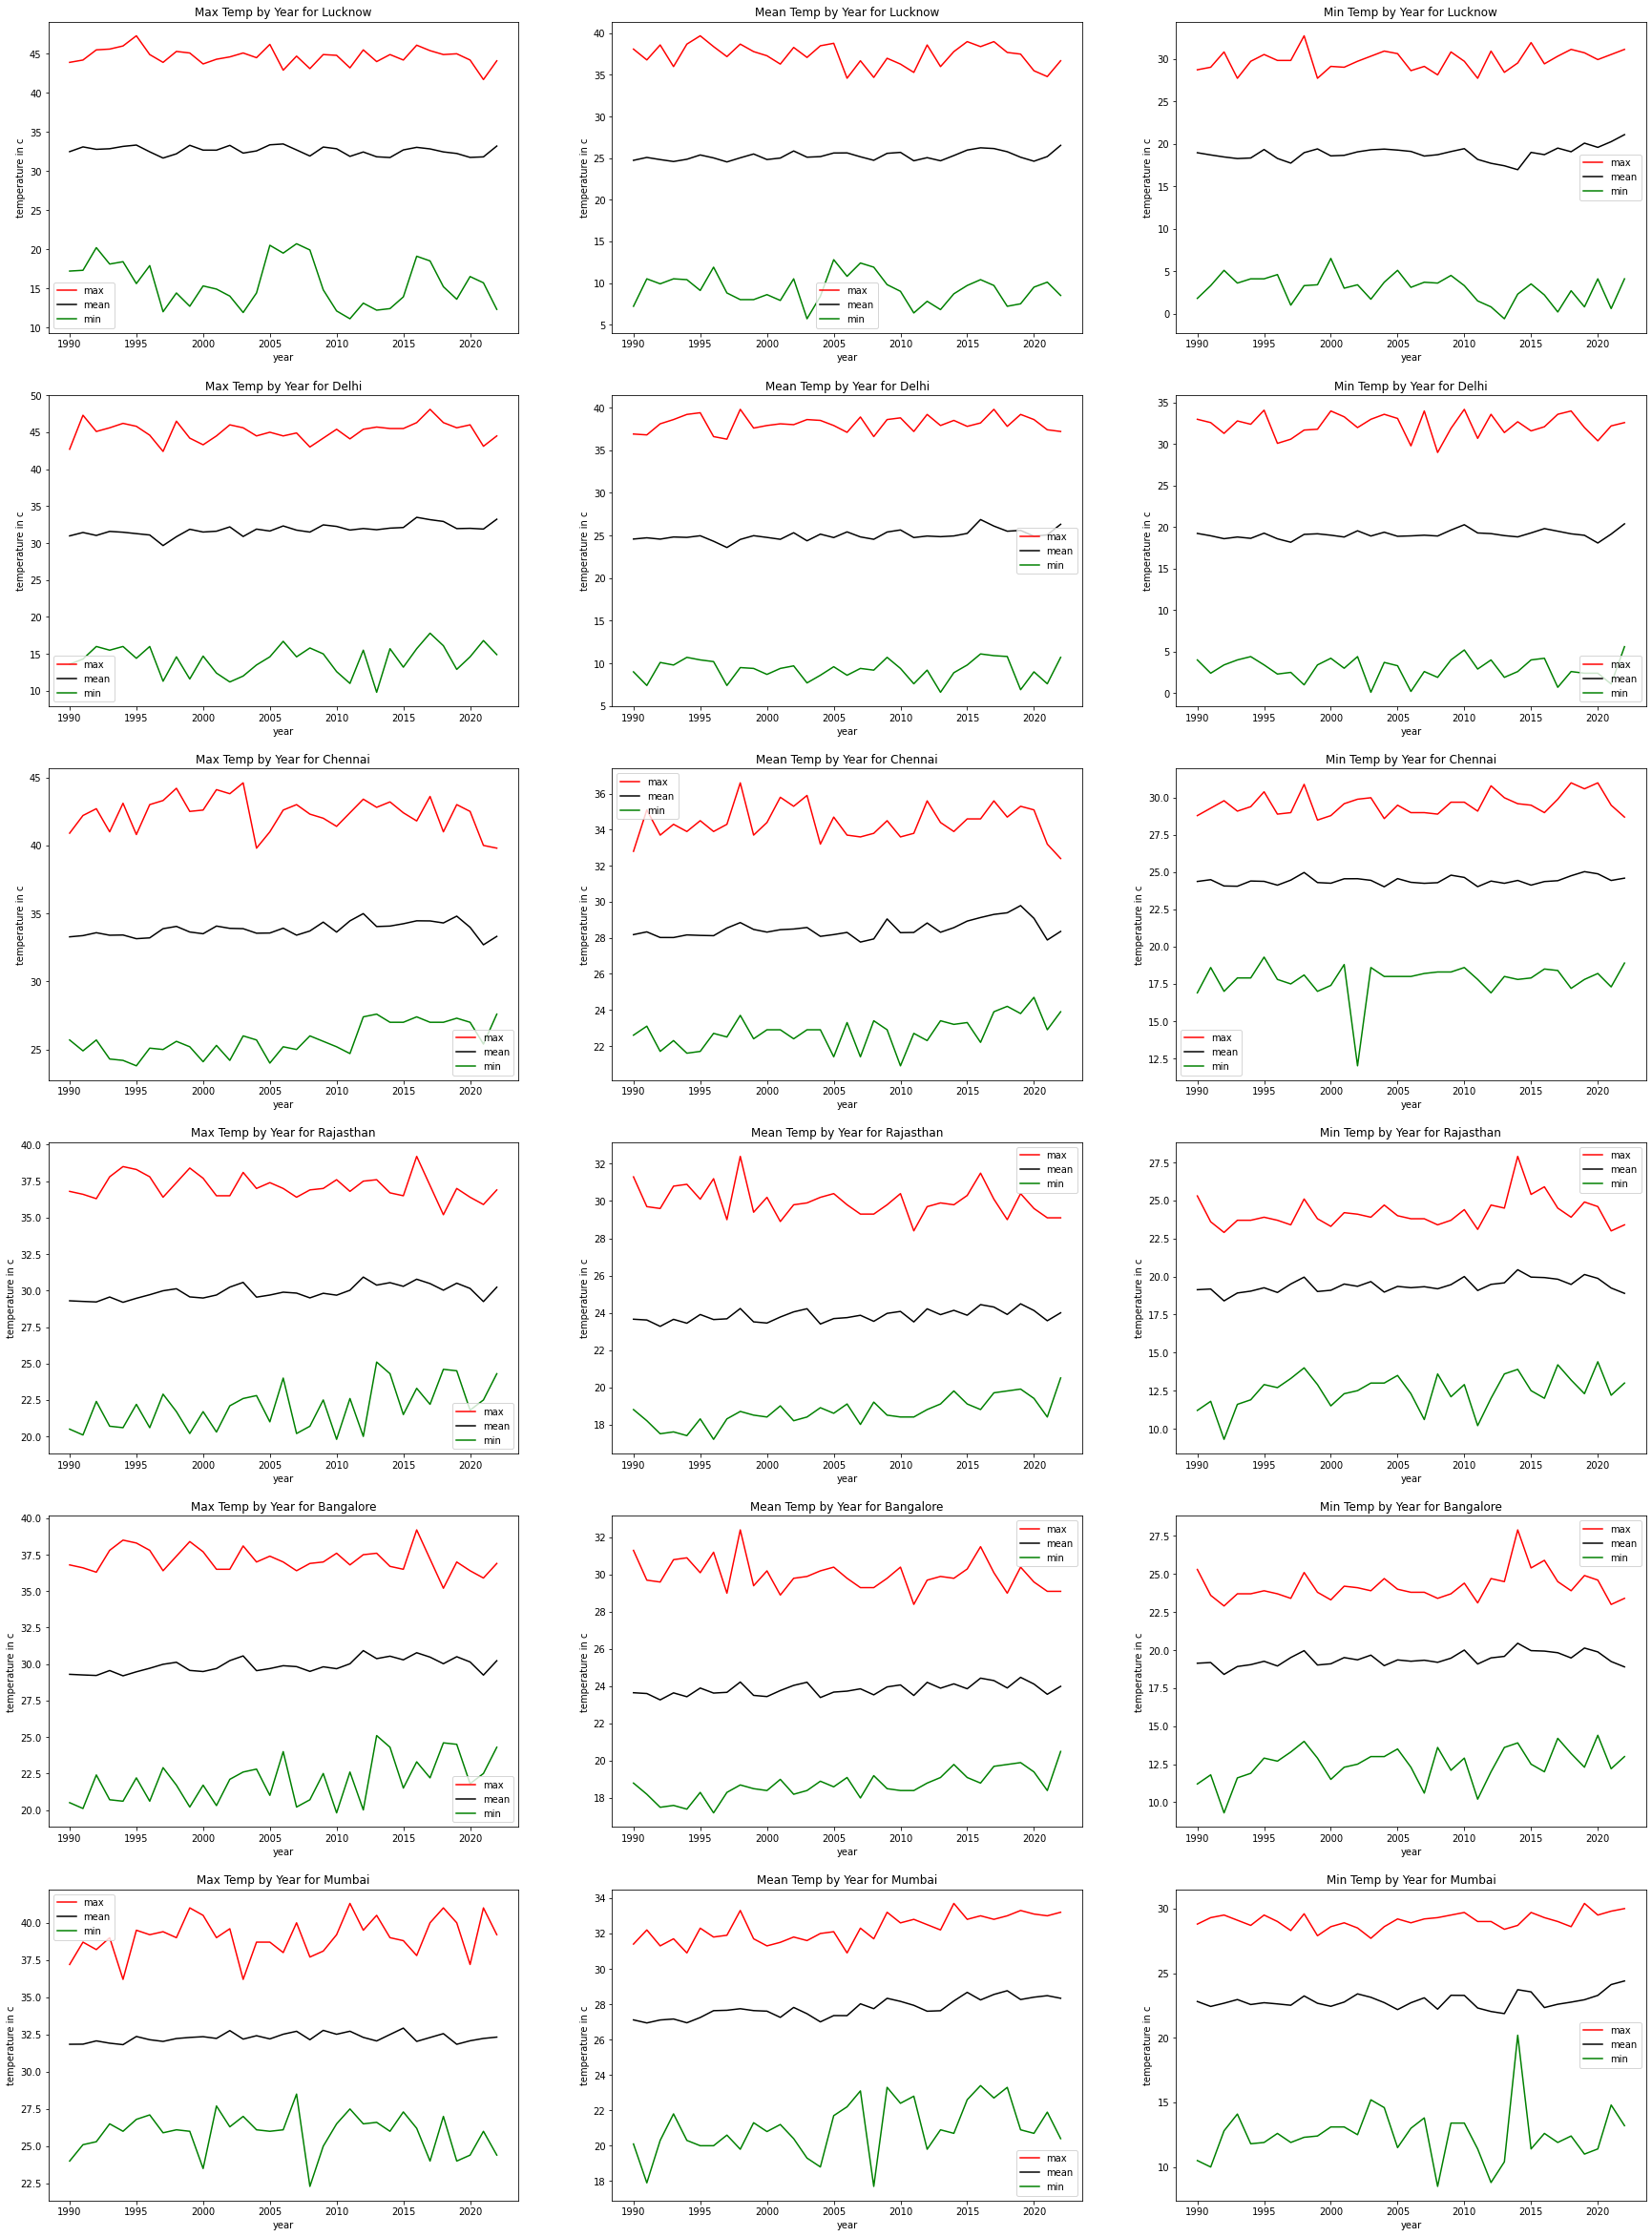

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

fig,ax = plt.subplots(len(cities),3,figsize=(30, len(cities)*7))

for i in range(len(cities)):
    city=cities[i]
    df_year_temps = df_data[df_data['city']==city].groupby('year').agg({'tmax':['max','mean','min'], 'tavg':['max','mean','min'], 'tmin':['max','mean','min']})
    ax[i][0].set_title(f'Max Temp by Year for {city}')
    ax[i][0].plot(df_year_temps.index, df_year_temps['tmax']['max'], label='max',color='red')
    ax[i][0].plot(df_year_temps.index, df_year_temps['tmax']['mean'], label='mean',color='black')
    ax[i][0].plot(df_year_temps.index, df_year_temps['tmax']['min'], label='min',color='green')
    ax[i][0].set_xlabel('year')
    ax[i][0].set_ylabel('temperature in c')
    ax[i][0].legend()

    ax[i][1].set_title(f'Mean Temp by Year for {city}')
    ax[i][1].plot(df_year_temps.index, df_year_temps['tavg']['max'], label='max',color='red')
    ax[i][1].plot(df_year_temps.index, df_year_temps['tavg']['mean'], label='mean',color='black')
    ax[i][1].plot(df_year_temps.index, df_year_temps['tavg']['min'], label='min',color='green')
    ax[i][1].set_xlabel('year')
    ax[i][1].set_ylabel(f'temperature in c')
    ax[i][1].legend()

    ax[i][2].set_title(f'Min Temp by Year for {city}')
    ax[i][2].plot(df_year_temps.index, df_year_temps['tmin']['max'], label='max',color='red')
    ax[i][2].plot(df_year_temps.index, df_year_temps['tmin']['mean'], label='mean',color='black')
    ax[i][2].plot(df_year_temps.index, df_year_temps['tmin']['min'], label='min',color='green')
    ax[i][2].set_xlabel('year')
    ax[i][2].set_ylabel('temperature in c')
    ax[i][2].legend()


fig.show()

### plot the monthly temperatures

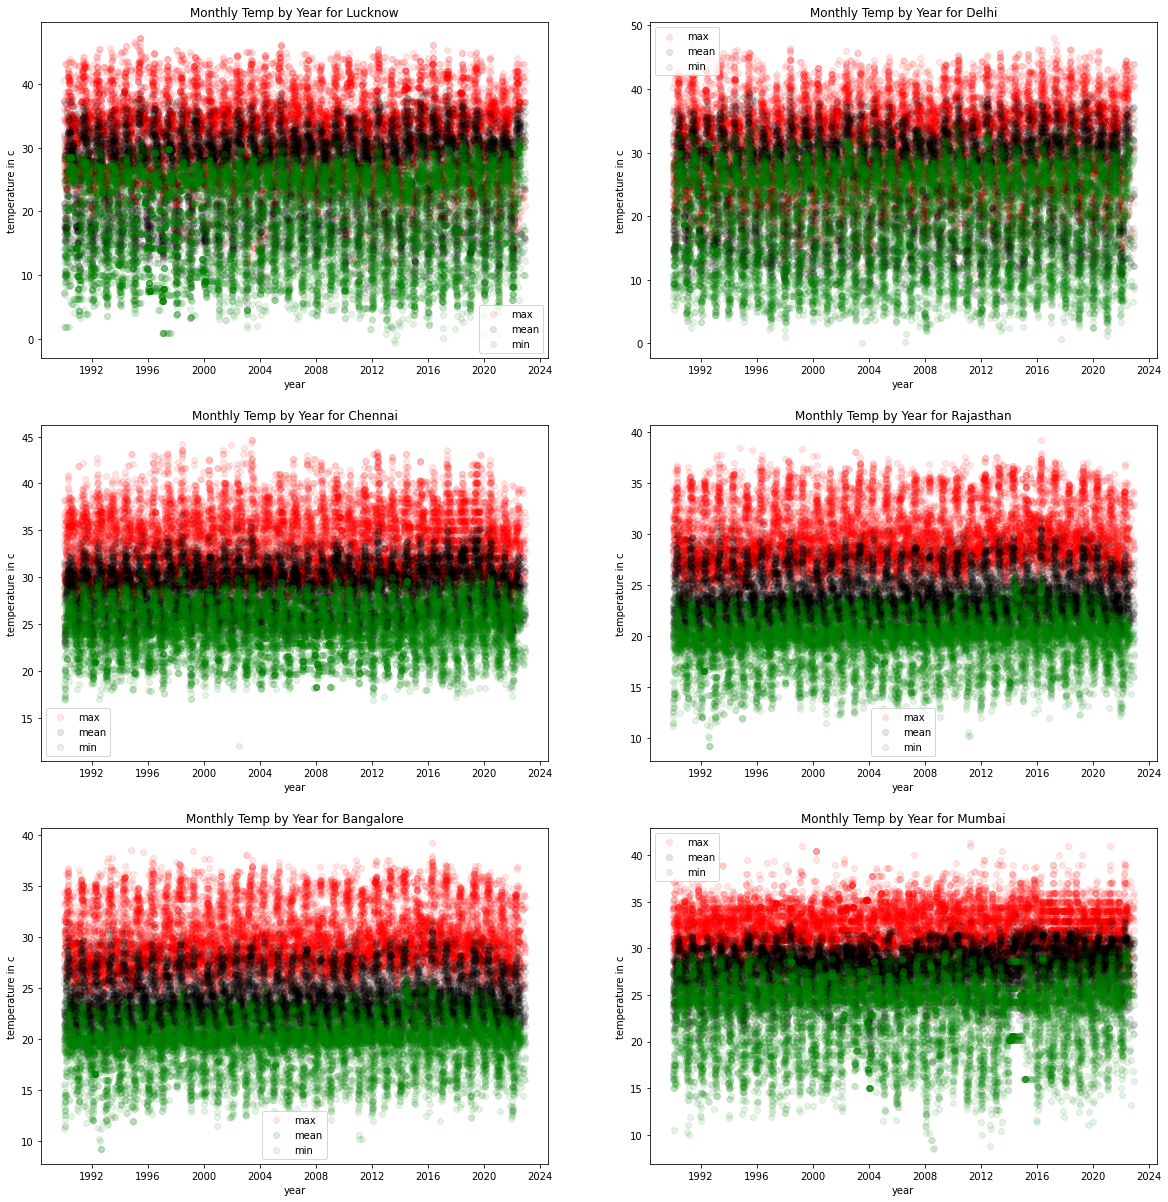

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

ht = 0

if len(cities) % 2 == 0:
    ht = int(len(cities)/2)
else:
    ht = int(len(cities)/2)+1

fig,ax = plt.subplots(ht,2,figsize=(20, ht*7))

wt=0
for i in range(len(cities)):
    city=cities[i]
    df_temps = df_data[df_data['city']==city]
    ax[i//2][wt].set_title(f'Monthly Temp by Year for {city}')
    ax[i//2][wt].scatter(df_temps['time2'], df_temps['tmax'], label='max',color='red', alpha=0.1)
    ax[i//2][wt].scatter(df_temps['time2'], df_temps['tavg'], label='mean',color='black', alpha=0.1)
    ax[i//2][wt].scatter(df_temps['time2'], df_temps['tmin'], label='min',color='green', alpha=0.1)
    ax[i//2][wt].set_xlabel('year')
    ax[i//2][wt].set_ylabel('temperature in c')
    ax[i//2][wt].legend()
    if wt == 0:
        wt = 1
    else:
        wt = 0

fig.show()

# Trying out forecasting

In [10]:
!pip install -q pystan kats 

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-9mi0bm1d/fbprophet_7346052e3f5d48159f209ea9bb07b4c1/setup.py", line 149, in <module>
          long_description_content_type='text/markdown',
        File "/opt/conda/lib/python3.7/site-packages/setuptools/__init__.py", line 153, in setup
          return distutils.core.setup(**attrs)
        File "/opt/conda/lib/python3.7/distutils/core.py", line 148, in setup
          dist.run_commands()
        File "/opt/conda/lib/python3.7/distutils/dist.py", line 966, in run_commands
   

In [11]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

In [12]:
data = df_simple_mean.reset_index()
data['year2']=pd.to_datetime(data.year,format="%Y")

In [13]:
df_s = TimeSeriesData(time=data['year2'], value=data['tavg'])
df_s

,year2,tavg
0,1990-01-01,25.319726
1,1991-01-01,25.384429
2,1992-01-01,25.177277
3,1993-01-01,25.315251
4,1994-01-01,25.271461
5,1995-01-01,25.590868
6,1996-01-01,25.395719
7,1997-01-01,25.280731
8,1998-01-01,25.770776
9,1999-01-01,25.600685


In [14]:
# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative')
# create a prophet model instance
model = ProphetModel(df_s, params)
# fit model simply by calling m.fit()
model.fit()


Initial log joint probability = -44.4931
Iteration  1. Log joint probability =    71.9913. Improved by 116.484.
Iteration  2. Log joint probability =    98.7666. Improved by 26.7754.
Iteration  3. Log joint probability =    118.802. Improved by 20.0354.
Iteration  4. Log joint probability =    134.262. Improved by 15.4596.
Iteration  5. Log joint probability =     137.99. Improved by 3.72796.
Iteration  6. Log joint probability =     139.19. Improved by 1.20021.
Iteration  7. Log joint probability =    139.192. Improved by 0.00211322.
Iteration  8. Log joint probability =    139.278. Improved by 0.0857853.
Iteration  9. Log joint probability =    139.404. Improved by 0.126545.
Iteration 10. Log joint probability =    139.479. Improved by 0.0745537.
Iteration 11. Log joint probability =    139.663. Improved by 0.184349.
Iteration 12. Log joint probability =    139.746. Improved by 0.0829985.
Iteration 13. Log joint probability =    139.809. Improved by 0.0630024.
Iteration 14. Log join

In [15]:
forecast = model.predict(steps=60)
forecast['time'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                      60
unique                     60
top       2023-01-01 00:00:00
freq                        1
first     2023-01-01 00:00:00
last      2082-01-01 00:00:00
Name: time, dtype: object

# Predicted Average Yearly Temperature (averaged over all cities) for the next 60 yrs

<AxesSubplot:xlabel='time', ylabel='y'>

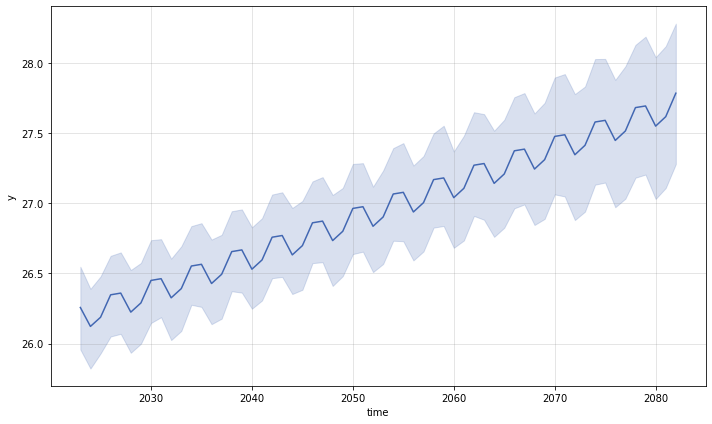

In [16]:
%matplotlib inline
# import plotly 
# plotly.offline.init_notebook_mode (connected = True)
model.plot()
